In [3]:
x1 = [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1] # +
x2 = [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1] # O
x3 = [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1] # <
x4 = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # S
x5 = [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1] # psi
x6 = [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1] # >

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import random

model = Sequential()
model.add(Dense(12, input_dim =26, activation = 'relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# to build training data. 
# index of ANN_TRUTH_SET_X matches index of one-hot encoded response in ANN_TRUTH_SET_Y
ANN_TRUTH_SET_X = [x1, x2, x3, x4, x5, x6]
ANN_TRUTH_SET_Y = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
]

LEN_OF_TRAINING_DATA = 1000

X = [x1, x2, x3, x4, x5, x6]
Y = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
]

for i in range(LEN_OF_TRAINING_DATA):
    # choose random integer to add that index of ANN_TRUTH_SET to training data
    rand_int = random.randint(0, 5) 
    X.append(ANN_TRUTH_SET_X[rand_int])
    Y.append(ANN_TRUTH_SET_Y[rand_int])

X = np.array(X)
Y = np.array(Y)
#model.fit(X, Y, epochs=150, batch_size=10)

#scores = model

In [62]:
history = model.fit(X, Y, epochs = 150, batch_size=10)

Epoch 1/150
101/101 [==============================] - 0s 855us/step - loss: 0.1295 - accuracy: 0.1948
Epoch 2/150
101/101 [==============================] - 0s 738us/step - loss: 0.0986 - accuracy: 0.7286
Epoch 3/150
101/101 [==============================] - 0s 734us/step - loss: 0.0689 - accuracy: 0.8330
Epoch 4/150
101/101 [==============================] - 0s 723us/step - loss: 0.0430 - accuracy: 1.0000
Epoch 5/150
101/101 [==============================] - 0s 708us/step - loss: 0.0241 - accuracy: 1.0000
Epoch 6/150
101/101 [==============================] - 0s 698us/step - loss: 0.0137 - accuracy: 1.0000
Epoch 7/150
101/101 [==============================] - 0s 685us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 8/150
101/101 [==============================] - 0s 713us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 9/150
101/101 [==============================] - 0s 704us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 10/150
101/101 [==============================] - 0s 706us/step - l

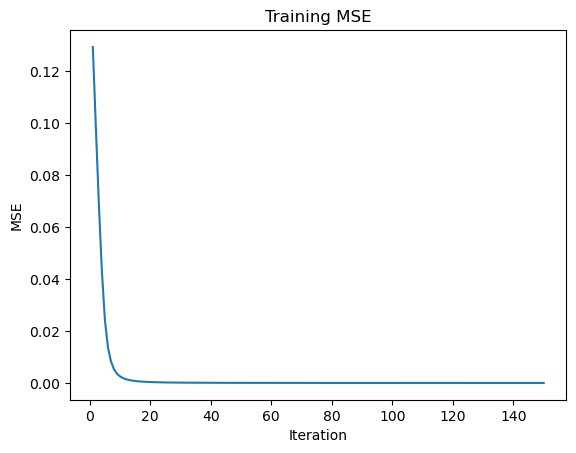

In [63]:
import matplotlib.pyplot as plt

iterations = len(history.history['loss'])
iteration_number_for_plot = [iteration for iteration in range(1, iterations + 1)]

plt.plot(
    iteration_number_for_plot,
    history.history['loss']
)
plt.title('Training MSE')
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.show()

In [84]:
print(model.predict(np.array([x1])).argmax(axis=1))

1/1 [==============================] - 0s 18ms/step
[0]


# Testing for Noisy Inputs

In [75]:
def replace_input(array, idx):

    current_val = array[idx]
    new_val = 1 if current_val == 0 else 0
    
    new_array = list(array)
    new_array[idx] = new_val

    return new_array

In [100]:
replacement_bits = random.sample(range(0, 24), 24)

def replace_and_predict(original_array, expected_prediction, replacement_bits, model):
    new_array = list(original_array)

    for elements_replaced, idx_to_replace in enumerate(replacement_bits):
        new_array = replace_input(new_array, idx_to_replace)
        if model.predict(np.array([new_array])).argmax(axis=1)[0] != expected_prediction:
            raise ValueError(f"ANN didn't predict output correctly after {elements_replaced + 1} elements changed\n\nOriginal Array:\n{original_array}\n\nNoisy Array:\n{new_array}")

print(f"The following indices of the original array will be replaced in this order:\n\n{replacement_bits}")


The following indices of the original array will be replaced in this order:

[4, 10, 1, 11, 16, 23, 18, 3, 14, 17, 9, 21, 6, 19, 12, 20, 5, 2, 0, 13, 8, 7, 15, 22]


In [101]:
replace_and_predict(x1, 0, replacement_bits, model)

1/1 [==============================] - 0s 19ms/step


ValueError: ANN didn't predict output correctly after 12 elements changed

Original Array:
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]

Noisy Array:
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1]

In [102]:
replace_and_predict(x2, 1, replacement_bits, model)

1/1 [==============================] - 0s 18ms/step


ValueError: ANN didn't predict output correctly after 12 elements changed

Original Array:
[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]

Noisy Array:
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]

In [104]:
replace_and_predict(x3, 2, replacement_bits, model)

1/1 [==============================] - 0s 18ms/step


ValueError: ANN didn't predict output correctly after 6 elements changed

Original Array:
[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

Noisy Array:
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]

In [105]:
replace_and_predict(x4, 3, replacement_bits, model)

1/1 [==============================] - 0s 17ms/step


ValueError: ANN didn't predict output correctly after 10 elements changed

Original Array:
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

Noisy Array:
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

In [106]:
replace_and_predict(x5, 4, replacement_bits, model)

1/1 [==============================] - 0s 20ms/step


ValueError: ANN didn't predict output correctly after 4 elements changed

Original Array:
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]

Noisy Array:
[0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]

In [107]:
replace_and_predict(x6, 5, replacement_bits, model)

1/1 [==============================] - 0s 18ms/step


ValueError: ANN didn't predict output correctly after 7 elements changed

Original Array:
[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]

Noisy Array:
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]